In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
conn = mysql.connector.connect(host='127.0.0.1',user='root',password='****',database='smartphones')

## MySQL - Connector :
- Provides Mysql server connectivity for client side programs
- It Can be Used together with Pandas , providing a wholesome enviroment for analysis & vizualization

In [2]:
pd.read_sql_query('SELECT * FROM sp LIMIT 5',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\683625081.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM sp LIMIT 5',con=conn)


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,,1080,2412


# Top 10  Brands With Most no of Models

In [3]:
df1 = pd.read_sql_query('''SELECT brand_name , COUNT(*) AS 'No of Models' FROM sp
GROUP BY brand_name 
ORDER BY COUNT(*) DESC 
LIMIT 10''',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\2469674631.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query('''SELECT brand_name , COUNT(*) AS 'No of Models' FROM sp


In [4]:
df1

,brand_name,No of Models
0,xiaomi,125
1,samsung,103
2,vivo,94
3,realme,92
4,oppo,82
5,motorola,48
6,poco,39
7,oneplus,37
8,iqoo,31
9,tecno,31


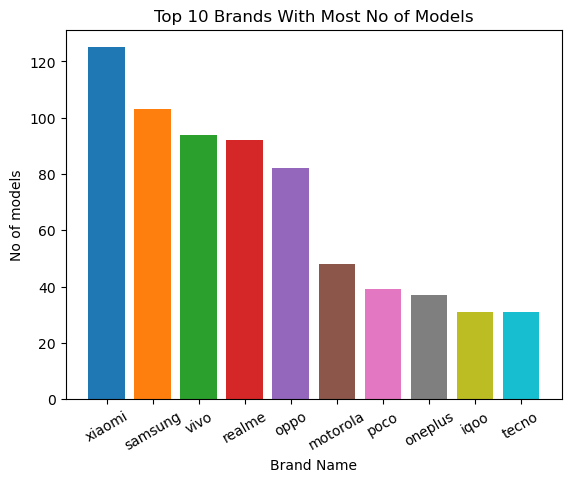

In [5]:
plt.xticks(rotation=30)
colors = plt.cm.tab10(range(len(df1.brand_name.unique())))
plt.bar(df1.brand_name,data=df1.iloc[:,1],height=df1.iloc[:,-1],color=colors)
plt.title('Top 10 Brands With Most No of Models')
plt.xlabel("Brand Name")
plt.ylabel("No of models")
plt.show()

## Top 10 Most Expensive Brands 

In [6]:
df2 = pd.read_sql_query('''SELECT brand_name , round(avg(price)) as 'avg_price' FROM sp
GROUP BY brand_name
HAVING COUNT(*)>10
ORDER BY avg_price DESC 
LIMIT 10 ''',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\3671329710.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query('''SELECT brand_name , round(avg(price)) as 'avg_price' FROM sp


In [7]:
df2

,brand_name,avg_price
0,apple,90909.0
1,oneplus,32177.0
2,iqoo,30635.0
3,samsung,29290.0
4,oppo,25768.0
5,xiaomi,23958.0
6,honor,22177.0
7,motorola,21588.0
8,vivo,21114.0
9,poco,18747.0


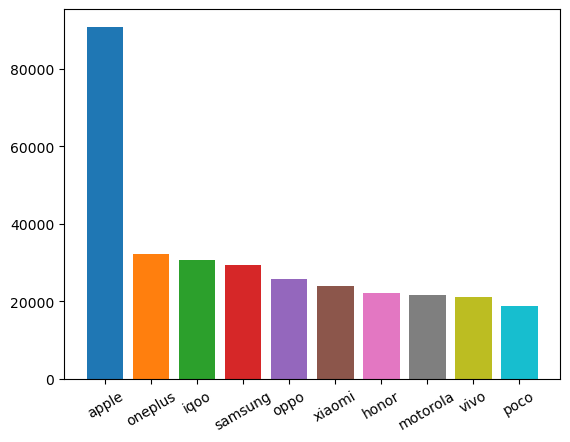

In [8]:
colors = plt.cm.tab10(range(len(df2.brand_name.unique())))
plt.bar(df2.brand_name,height=df2.iloc[:,1],color=colors)

plt.xticks(rotation=30)
plt.show()

## Ratio of OS [Android - IOS-Other]

In [9]:
df3 = pd.read_sql_query('''SELECT os,COUNT(*) AS No_of_Models 
FROM sp
WHERE os != ""
GROUP BY os
ORDER BY COUNT(*)
''',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\1302676115.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query('''SELECT os,COUNT(*) AS No_of_Models


In [10]:
df3

,os,No_of_Models
0,other,6
1,ios,21
2,android,795


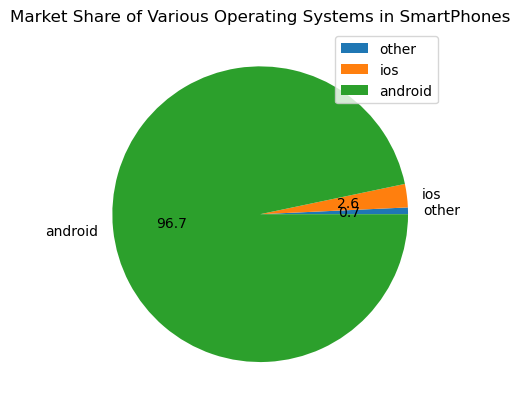

In [11]:
plt.pie(df3.No_of_Models,labels=df3.os,autopct="%0.01f",labeldistance=1.1)
plt.legend()
plt.title("Market Share of Various Operating Systems in SmartPhones")
plt.show()

## Distribution of 5g - Non 5g Phones

In [12]:
df4 = pd.read_sql_query('''SELECT has_5g , COUNT(*) AS freq FROM sp
GROUP BY has_5g''',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\839732250.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql_query('''SELECT has_5g , COUNT(*) AS freq FROM sp


In [13]:
df4

,has_5g,freq
0,True,451
1,False,379


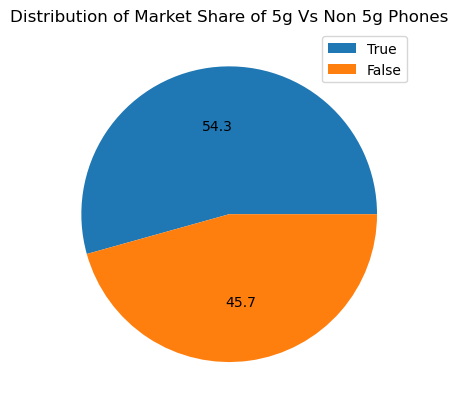

In [14]:
plt.pie(df4.freq,autopct="%0.1f")
plt.legend(df4.has_5g)
plt.title("Distribution of Market Share of 5g Vs Non 5g Phones")
plt.show()

## Market Share of Various Processors

In [15]:
df5 = pd.read_sql_query('''SELECT processor_brand,COUNT(*) AS 'Count'
FROM sp
WHERE processor_brand != ""
GROUP BY processor_brand''',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\975244680.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql_query('''SELECT processor_brand,COUNT(*) AS 'Count'


In [16]:
df5

,processor_brand,Count
0,snapdragon,353
1,exynos,42
2,dimensity,173
3,bionic,21
4,helio,188
5,unisoc,17
6,tiger,20
7,google,3
8,sc9863a,2
9,kirin,3


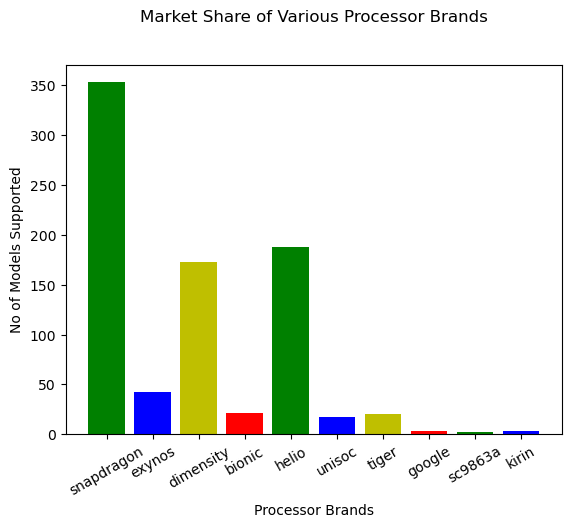

In [17]:
# colors = plt.cm.tab10(range(len(df5.processor_brand.unique())))
colors = ['g','b','y','r']
plt.bar(df5.processor_brand,height=df5.Count,color=colors)
plt.title('Market Share of Various Processor Brands\n\n')
plt.xlabel('Processor Brands')
plt.ylabel('No of Models Supported')
plt.xticks(rotation=30)
plt.show()

In [18]:
df = pd.read_sql_query('SELECT * FROM sp',con=conn)

C:\Users\itCare\AppData\Local\Temp\ipykernel_199700\331194104.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('SELECT * FROM sp',con=conn)


In [19]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,oppo,Oppo Find X6,69990,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,32.0,0,,1080,2400
826,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,,1080,2460
827,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
828,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,,1080,2460


In [20]:
pd.crosstab(df['brand_name'],df['has_5g'],normalize='index')

has_5g,False,True
brand_name,,
apple,0.238095,0.761905
asus,0.000000,1.000000
blackview,0.000000,1.000000
blu,0.000000,1.000000
cola,1.000000,0.000000
doogee,0.500000,0.500000
gionee,1.000000,0.000000
google,0.375000,0.625000
honor,0.272727,0.727273
